In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 5.4MB/s 
     |████████████████████████████████| 194kB 29.2MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 1.2MB 37.9MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 12.8MB 247kB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastbook import *


In [ ]:
ruta = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
ruta.ls

<bound method Path.ls of Path('/root/.fastai/data/mnist_sample')>

In [ ]:
(ruta/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [ ]:
tres = (ruta/'train'/'3').ls().sorted()
siete = (ruta/'train'/'7').ls().sorted()
tres

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [ ]:
ruta_im3 = tres[1]
im3=Image.open(ruta_im3)
im3

In [ ]:
 array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
im3_t = tensor (im3)
a = pd.DataFrame(im3_t[4:15,4:22])
a.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
siete_tensores =[tensor(Image.open(o)) for o in siete]
tres_tensores =[tensor(Image.open(o)) for o in tres]
len(tres_tensores), len(siete_tensores)

(6131, 6265)

In [ ]:
siete_tensores= [tensor(Image.open(x)) for x in siete]
tres_tensores =[tensor(Image.open(x)) for x in tres]
len(tres_tensores), len(siete_tensores)

(6131, 6265)

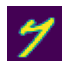

In [ ]:
show_image(siete_tensores[1]);

In [ ]:
sietes_apilados = torch.stack(siete_tensores).float()/255
tres_apilados = torch.stack(tres_tensores).float()/255
tres_apilados.shape

torch.Size([6131, 28, 28])

In [ ]:
len (sietes_apilados.shape)

3

In [ ]:
tres_apilados.ndim

3

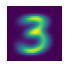

In [ ]:
promedio3 = tres_apilados.mean(0)
show_image(promedio3)

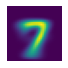

In [ ]:
promedio7 =sietes_apilados.mean(0)
show_image(promedio7)

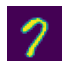

In [ ]:
a_7 =sietes_apilados[3]
show_image(a_7)

In [ ]:
dist_abs_7 =(a_7-promedio7).abs().mean()
dist_cua_7 =((a_7-promedio7)**2).mean().sqrt()
dist_abs_7,dist_cua_7


(tensor(0.0909), tensor(0.1792))

In [ ]:
F.l1_loss(a_7.float(),promedio7),
F.mse_loss(a_7,promedio7).sqrt()

tensor(0.1792)

In [ ]:
datos =[[1,2,3],[4,5,6]]

In [ ]:
tup =array(datos)
tns = tensor(datos)

In [ ]:
tup

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
tns[:,2]

tensor([3, 6])

In [ ]:
tns[1,1:3]

tensor([5, 6])

In [ ]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [ ]:
tns/2

tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])

In [ ]:
tns.type()

'torch.LongTensor'

In [ ]:
valid_3_tensor =torch.stack([tensor(Image.open(a)) for a in (ruta/'valid'/'3').ls()])

valid_3_tensor = valid_3_tensor.float()/255

valid_7_tensor = torch.stack([tensor(Image.open(a)) for a in (ruta/'valid'/'7').ls()])
valid_7_tensor =valid_7_tensor.float()/255
valid_3_tensor.shape,valid_7_tensor.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance (a_7,promedio7)

tensor(0.0909)

In [ ]:
torch.mean?

In [ ]:
valid_7_distancia = mnist_distance(valid_7_tensor,promedio7)
valid_7_distancia, valid_7_distancia.shape

(tensor([0.1125, 0.0909, 0.1040,  ..., 0.1350, 0.1215, 0.0877]),
 torch.Size([1028]))

In [ ]:
def es_7(x): return mnist_distance(x,promedio7) < mnist_distance(x,promedio3)
es_7(a_7), es_7(a_7).float()

(tensor(True), tensor(1.))

In [ ]:
es_7(valid_7_tensor)

tensor([True, True, True,  ..., True, True, True])

In [ ]:
efectividad_7s = es_7(valid_7_tensor).float().mean()
efectividad_3s = (1-es_7(valid_3_tensor).float()).mean()
efectividad_7s,efectividad_3s, (efectividad_3s+efectividad_7s)/2

(tensor(0.9854), tensor(0.9168), tensor(0.9511))

In [ ]:
def pr_ocho(x,w):  return (x*w).sum()

In [ ]:
def f(x): return x**2

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


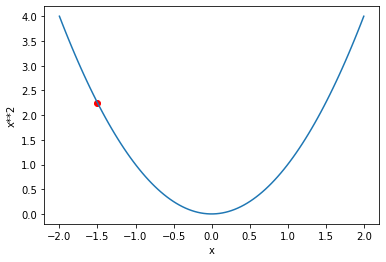

In [ ]:
plot_function(f,'x','x**2')
plt.scatter(-1.5,f(-1.5),color='red')

In [ ]:
xt = tensor(3.).requires_grad_()
xt

tensor(3., requires_grad=True)

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor(6.)

In [ ]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return (x**2).sum()
yt=f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [ ]:
time = torch.arange(0,20).float();time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

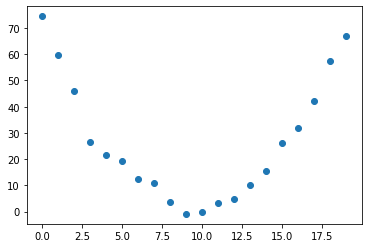

In [ ]:
speed = torch.randn(20)*3+0.75*(time-9.5)**2+1
plt.scatter(time,speed)

In [ ]:
def f(t,params):
  a,b,c=params
  return a *(t**2)+(b*t)+c

In [ ]:
def mse(pred,targets): return ((preds-targets)**2).mean()

In [ ]:
#Iniciar parametros
params = torch.randn(3).requires_grad_()

#calcular los parametros
preds =f(time,params)


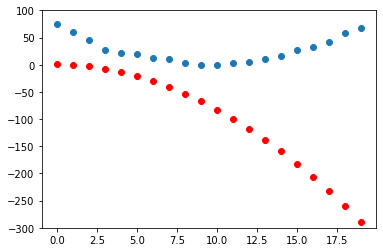

In [ ]:
#funcion para ver la precision de las predicciones de los valores
def mostrar_preds(preds,ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time,speed)
  ax.scatter(time,to_np(preds),color='red')
  ax.set_ylim(-300,100)
mostrar_preds(preds)

In [ ]:
perdida = mse (preds,speed)
perdida

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [ ]:
#calcular la gradiente

In [ ]:
perdida.backward()
params.grad

tensor([29901.0918,  1916.4382,   111.7121])

In [ ]:
params.grad*1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [ ]:
# colocar los pesos
lr= 1e-5
params.data -= lr*params.grad.data
params.grad =None

In [ ]:
preds =f(time,params)
mse(preds,speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

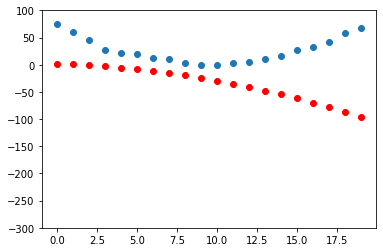

In [ ]:
mostrar_preds(preds)

In [ ]:
#colocar todos los pasos en una sola funcion

def aplicar_paso (params,prn=True):
  preds=f(time,params)
  perdida= mse(preds,speed)
  perdida.backward()
  params.data -= lr*params.grad.data
  params.grad = None
  if prn:print(perdida.item())
  return preds

In [ ]:
#repetir el proceso
for i in range(3):
   aplicar_paso(params)

RuntimeError: ignored

RuntimeError: ignored

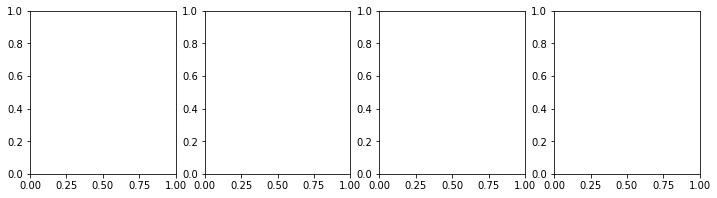

In [ ]:
_,axs =plt.subplots(1,4,figsize=(12,3))
for ax in axs: mostrar_preds(aplicar_paso(params,False),ax)
plt.tight_layout()

In [ ]:
entrenamiento_x = torch.cat([tres_apilados,sietes_apilados]).view(-1,28*28)

In [ ]:
entrenamiento_y = tensor([1]*len(tres)+[0]*len(siete)).unsqueeze(1)
entrenamiento_x.shape, entrenamiento_y.shape
entrenamiento_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [ ]:
dset =list(zip(entrenamiento_x, entrenamiento_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [ ]:
x_valido = torch.cat([valid_3_tensor,valid_7_tensor]).view(-1,28*28)
y_valido = tensor([1]*len(valid_3_tensor) + [0]*len(valid_7_tensor)).unsqueeze(1)
dset_valido= list(zip(x_valido, y_valido))

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [ ]:
pesos = init_params((28*28,1))

In [ ]:
bias = init_params(1)

In [ ]:
(entrenamiento_x[0]*pesos.T).sum()+bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [ ]:
def linear1(xb): return xb@pesos + bias
prediccion = linear1(entrenamiento_x)
prediccion

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [ ]:
correctos = (prediccion>0.0).float() == entrenamiento_y
correctos

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [ ]:
correctos.float().mean().item()

0.4912068545818329

In [ ]:
pesos [0] *= 1.0001
prediccion = linear1(entrenamiento_x)
((prediccion>0.0).float() == entrenamiento_y).float().mean().item()

0.4912068545818329

In [ ]:
objetivos = tensor([1,0,1])
prediccion_2 = tensor([0.9,0.4,0.2])

In [ ]:
def mnist_perdida(trgts, prds):
  return torch.where(trgts == 1, 1-prds,prds).mean()


In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

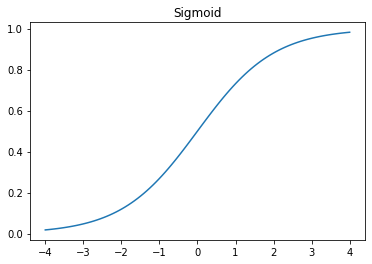

In [ ]:
plot_function(torch.sigmoid, title ='Sigmoid', min=-4,max=4)

In [ ]:
def mnist_perdida(trgts, prds):
  prds=prds.sigmoid()
  return torch.where(trgts == 1, 1-prds,prds).mean()

In [ ]:
coll =range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
dl= DataLoader(ds, batch_size=6,shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [ ]:
for x,y in dl:
  pred = model(x)
  loss =loss_func(pred,y)
  loss.backward()
  parametrer -=parameters.grad*lr

NameError: ignored

In [ ]:
pesos= init_params((28*28,1))
bias =init_params(1)

In [ ]:
dl =DataLoader(dset,batch_size=256)
xb,yb =first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
dl_valido =DataLoader(dset_valido,batch_size=256)

In [ ]:
batch =entrenamiento_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
predicciones = linear1(batch)
predicciones

tensor([[-12.6814],
        [-16.2982],
        [-14.2231],
        [-27.4478]], grad_fn=<AddBackward0>)

In [ ]:
perdidas = mnist_perdida(predicciones, entrenamiento_y[:4])
perdidas

RuntimeError: ignored